# Churn Analysis

## We can classify customer churn (also known as customer attrition) by grouping them into different categories. 
### Contractual Churn, which is applicable to businesses such as cable companies and SAAS service providers, is when customers decide not to continue with their expired contracts.
### Voluntary Churn, on the other hand, is when a customer decides to cancel their existing service, which can be applicable for companies such as prepaid cellphones and streaming subscription providers.
### There are also times when consumers leave a possible purchase without completing the transaction. We can categorize these instances as non-contractual churn, which is applicable for businesses that rely on retail locations, online stores or online borrowing services.
### And lastly, there is the involuntary churn, for instance where a customer can not pay their credit card bill and no longer stays with the credit card company.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Churn_Modeling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# Looking for missing data
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

RowNumber
False    10000
Name: RowNumber, dtype: int64

CustomerId
False    10000
Name: CustomerId, dtype: int64

Surname
False    10000
Name: Surname, dtype: int64

CreditScore
False    10000
Name: CreditScore, dtype: int64

Geography
False    10000
Name: Geography, dtype: int64

Gender
False    10000
Name: Gender, dtype: int64

Age
False    10000
Name: Age, dtype: int64

Tenure
False    10000
Name: Tenure, dtype: int64

Balance
False    10000
Name: Balance, dtype: int64

NumOfProducts
False    10000
Name: NumOfProducts, dtype: int64

HasCrCard
False    10000
Name: HasCrCard, dtype: int64

IsActiveMember
False    10000
Name: IsActiveMember, dtype: int64

EstimatedSalary
False    10000
Name: EstimatedSalary, dtype: int64

Exited
False    10000
Name: Exited, dtype: int64



In [3]:
# Looking at data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
# looking at the summary
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Text(34.834322916666665, 0.5, 'Estimated Salary')

<Figure size 1440x1440 with 0 Axes>

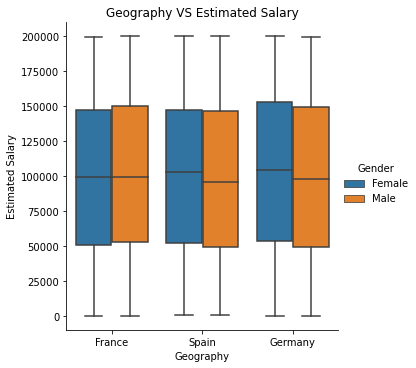

In [5]:
# Looking at Geography and Gender Distribution against Estimated Salary
plt.figure(figsize=(20,20))
sns.catplot(x="Geography", y="EstimatedSalary", hue="Gender", kind="box", data=df)
plt.title("Geography VS Estimated Salary")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

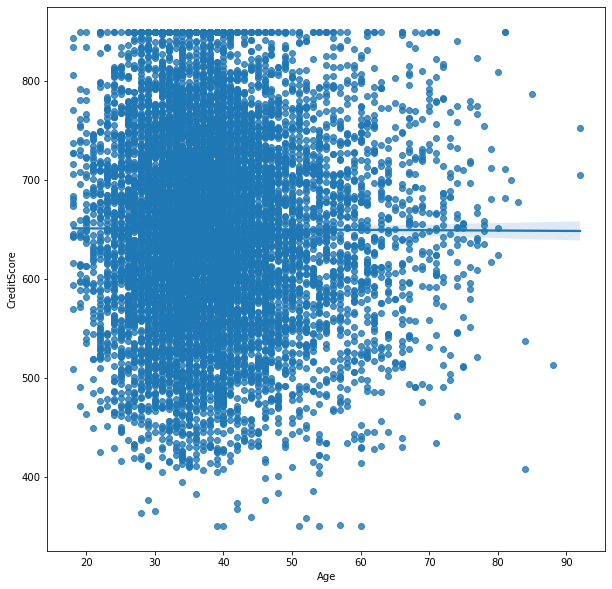

In [6]:
# Looking at linear relationship between Age and CreditScore
plt.figure(figsize=(10,10))
sns.regplot(x="Age", y="CreditScore", data=df)

In [7]:
# Selecting and Preparing the Feature Set and Target
X = df[["CreditScore", "Geography", "Gender", "Age", "Tenure", "EstimatedSalary"]].values
y=df[["Exited"]]
X[0:5], y[0:5]

(array([[619, 'France', 'Female', 42, 2, 101348.88],
        [608, 'Spain', 'Female', 41, 1, 112542.58],
        [502, 'France', 'Female', 42, 8, 113931.57],
        [699, 'France', 'Female', 39, 1, 93826.63],
        [850, 'Spain', 'Female', 43, 2, 79084.1]], dtype=object),
    Exited
 0       1
 1       0
 2       1
 3       0
 4       0)